# Task 2b Solution

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
sci = np.load('data/detection_sci.npy') # read detection sci image
wht = np.load('data/detection_wht.npy') # read detection wht image

--- cut out a portion of the image for analysis

In [3]:
x = 3100 # x-center of the image
y = 1800 # y-center of the image
r = 200 # width/2 of cutout, must be int

In [4]:
sci = sci[x-r:x+r, y-r:y+r] # cutout a portion of the science image
wht = wht[x-r:x+r, y-r:y+r] # cutout a portion of the weight image

--- define the noise in each pixel and make a significance map (signal/noise)

In [5]:
noise = 1./np.sqrt(wht) #Â conversion from weight to noise
sig = sci/noise # signifance map

--- colour the pixels by significance

In [6]:
threshold = 2.5  #Set a threshold value

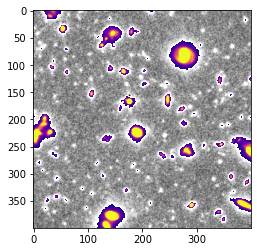

In [7]:
plt.imshow(sig, vmin = -threshold, vmax = threshold, cmap = 'Greys_r') # plot all pixels and scale between significance = -threshold to threshold
plt.imshow(np.ma.masked_where(sig <= threshold, sig), cmap = 'plasma', vmin = threshold, vmax = 50) # only plot pixels with significance > threshold
plt.show()